# Knock airport Weather

### assignment_6_Weather.ipynb


![openstreetmap](https://upload.wikimedia.org/wikipedia/commons/thumb/f/f6/Map_of_Knock_Airport.png/640px-Map_of_Knock_Airport.png)

***

Get the data from this link.

https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv


Plot:

The temperature
The mean temperature each day
The mean temperature for each month

## Libraries

***

We use pandas for the dataFrame data structure.

It allows to investigate [CSV](https://pandas.pydata.org/docs/user_guide/10min.html) files, amongst other features.

[matplotlib](https://www.w3schools.com/python/matplotlib_pyplot.asp) is theplotting library in python that serves as a 
visualization utility.

[NumPy](https://www.w3schools.com/python/numpy/default.asp) to help us working with arrays.

In [60]:
# Data frames. 
import pandas as pd

# Plotting.
import matplotlib.pyplot as plt

import seaborn as sns

# Clean CSV
import csv

# Numerical arrays.
import numpy as np

### Load data

***

#### Load the weather data from URL.

In [61]:
df = pd.read_csv(
    "./hly4935.csv",
    skiprows=23,
    dtype=dtype_spec,
    na_values=["", " ", "NA", "N/A", "-", "null"]
)


In [62]:
for col in dtype_spec.keys():
    df[col] = pd.to_numeric(df[col], errors='coerce')


In [63]:
print(df['rain'].unique())  # Replace 'rain' with problematic column names


[ 0.   0.1  nan  1.   3.1  0.7  0.3  0.6  1.5  3.3  0.2  0.4  2.3  1.2
  0.5  1.9  0.8  0.9  1.1  4.8  1.3 13.4  1.7  3.4  1.6  2.8  1.4  2.7
  4.   2.1  4.7  2.   2.2  3.7  2.4  4.1  3.2  2.6  1.8  4.4  6.5  6.1
  3.5  3.6  2.9  2.5  5.2  4.2  4.6  4.3  3.9  5.5  7.8  5.7  3.8  3.
  5.4  7.3  7.5  8.   4.9  6.6  6.7  5.1  8.5  9.9  5.   7.   8.2  6.2
 12.9 13.2  8.9  6.3  6.   6.9  8.1 14.2  5.9 11.4  4.5 11.6  5.6  9.1
  8.6  5.8  8.4 16.   6.4 16.5  7.6  6.8  5.3  7.4  9.  11.7  7.2  8.7
  9.4 10.9 12.4 18.7 13.6  7.7 15.2 16.9 11.1  8.3  8.8  7.9  9.2 13.8
  9.5 12.7 11.9 10. ]


In [64]:
df['rain'] = df['rain'].astype(str).str.replace("[^0-9.]", "", regex=True)



In [65]:
df['rain'] = pd.to_numeric(df['rain'], errors='coerce')


In [66]:
print(df['rain'].dtype)
print(df['rain'].head())


float64
0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: rain, dtype: float64


## Plot:

The temperature

The mean temperature each day

The mean temperature for each month

***


C:\Users\hugoc\AppData\Local\Temp\ipykernel_8804\2906116141.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'], dayfirst=True)


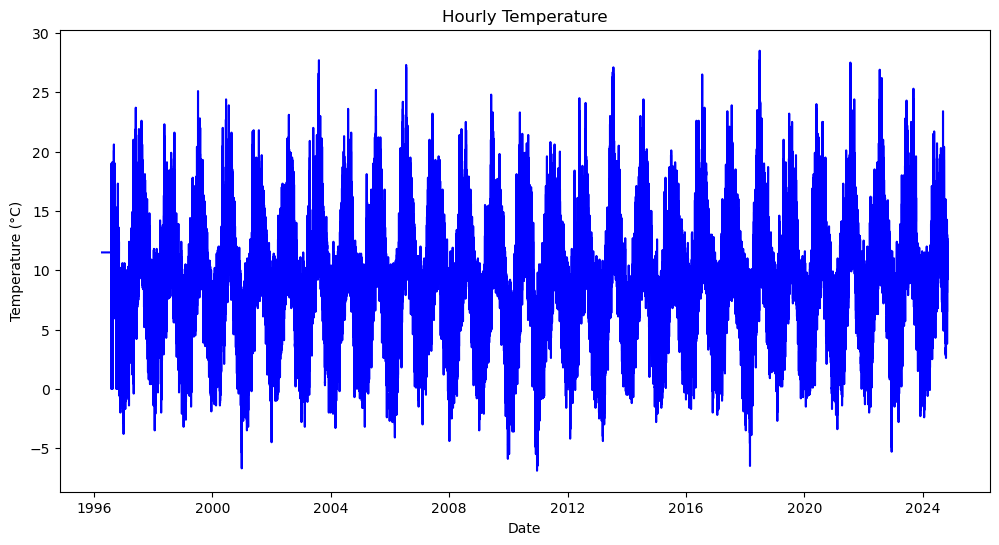

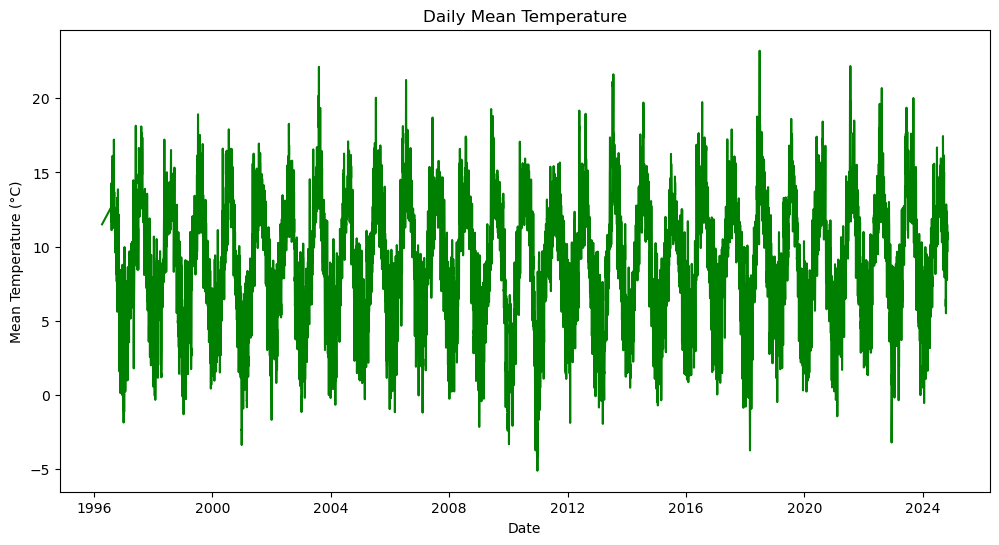

C:\Users\hugoc\AppData\Local\Temp\ipykernel_8804\2906116141.py:24: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_mean_temp = df['temp'].resample('M').mean()


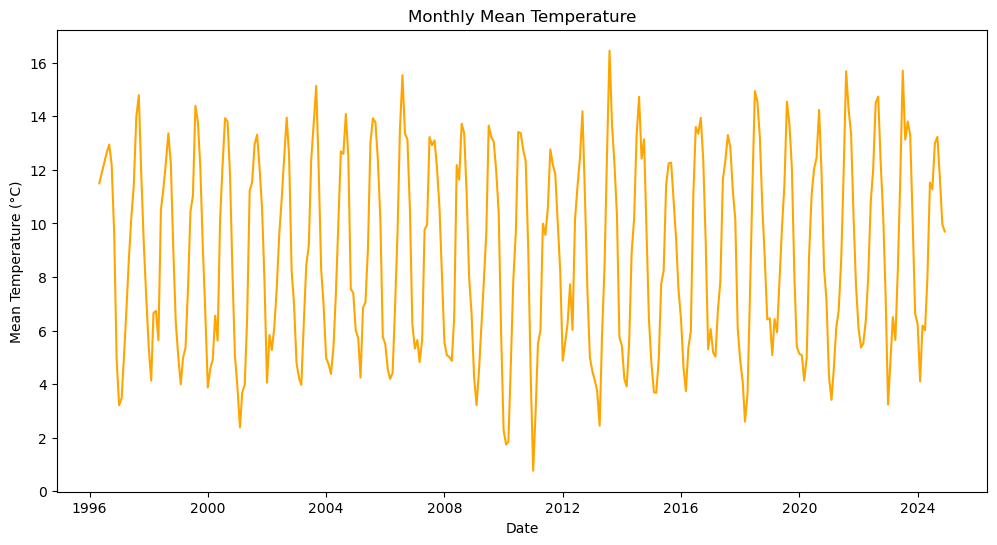

In [67]:
# Convert 'date' column to datetime format and set as index
df['date'] = pd.to_datetime(df['date'], dayfirst=True)
df.set_index('date', inplace=True)

# Now proceed with the plotting
# Plot 1: Hourly Temperature
plt.figure(figsize=(12, 6))
sns.lineplot(x=df.index, y=df['temp'], color='blue')
plt.title('Hourly Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.show()

# Plot 2: Mean Temperature Per Day
daily_mean_temp = df['temp'].resample('D').mean()
plt.figure(figsize=(12, 6))
sns.lineplot(x=daily_mean_temp.index, y=daily_mean_temp, color='green')
plt.title('Daily Mean Temperature')
plt.xlabel('Date')
plt.ylabel('Mean Temperature (°C)')
plt.show()

# Plot 3: Mean Temperature Per Month
monthly_mean_temp = df['temp'].resample('M').mean()
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_mean_temp.index, y=monthly_mean_temp, color='orange')
plt.title('Monthly Mean Temperature')
plt.xlabel('Date')
plt.ylabel('Mean Temperature (°C)')
plt.show()


## Plot:

The Windspeed (there is data missing from this column)

The rolling windspeed (say over 24 hours)

The max windspeed for each day

The monthly mean of the daily max windspeeds


***

In [70]:
print(df['wdsp'].dtype)  # Should output float64 or int64


float64


In [71]:
print(df['wdsp'].head())


date
1996-04-10 14:00:00    0.0
1996-07-31 08:00:00    0.0
1996-07-31 09:00:00    0.0
1996-07-31 10:00:00    0.0
1996-07-31 11:00:00    0.0
Name: wdsp, dtype: float64


In [76]:
df.fillna({'wdsp': 0}, inplace=True)


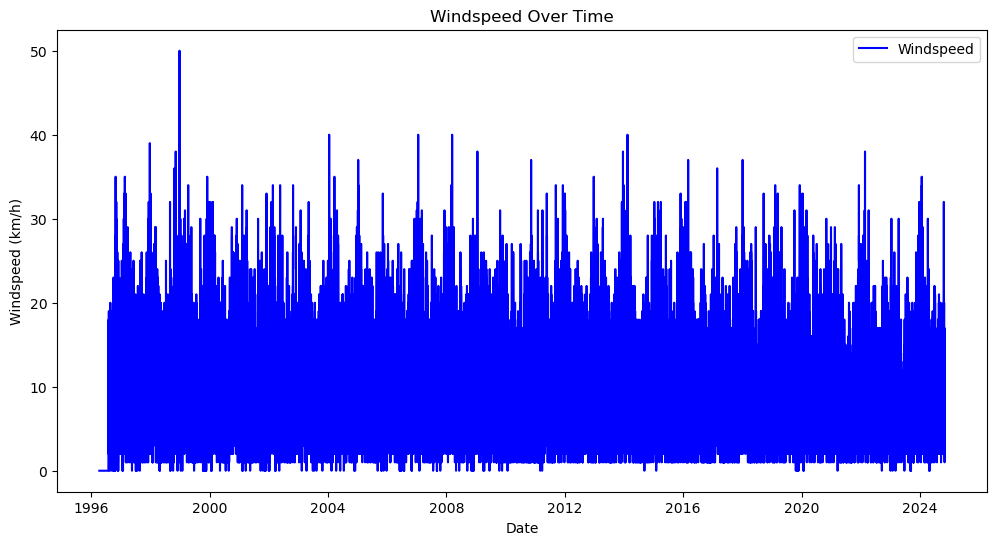

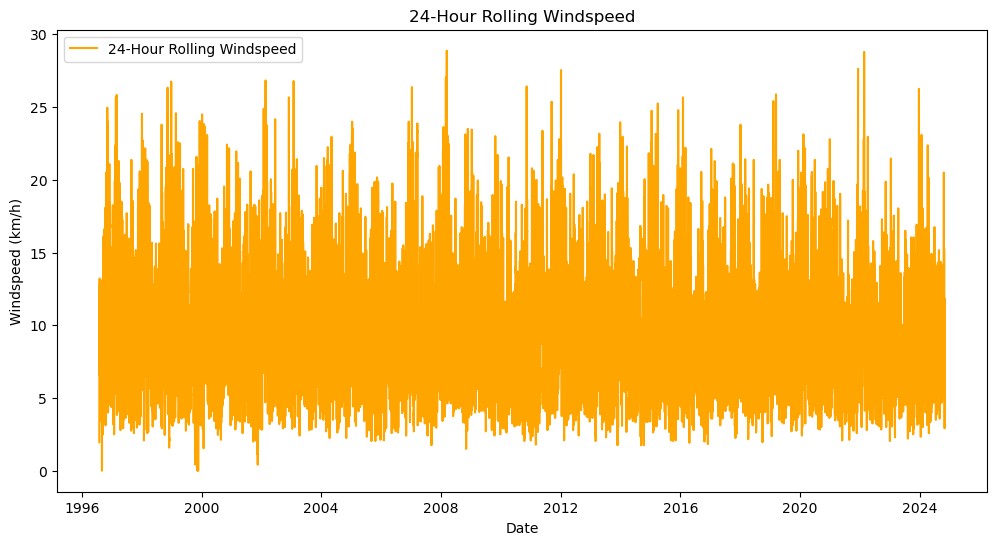

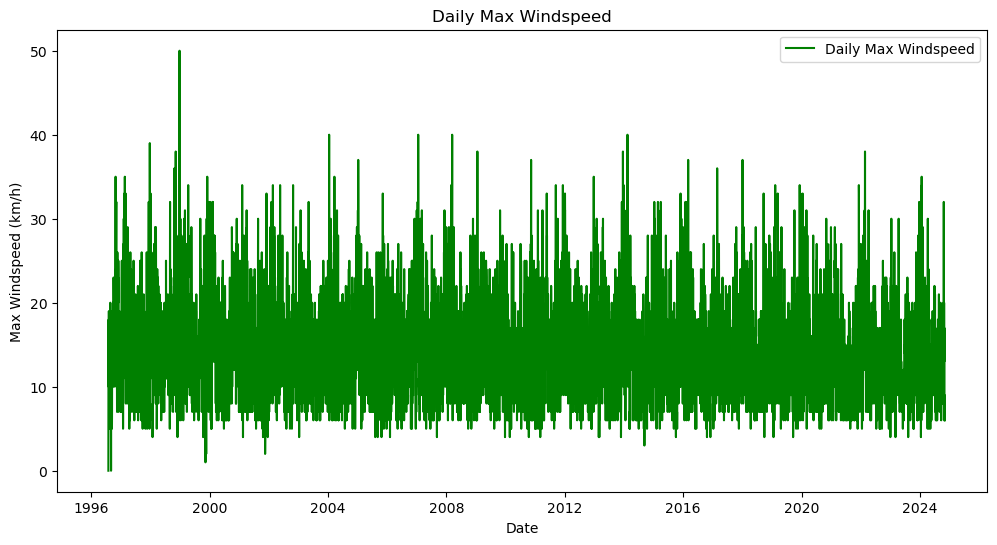

C:\Users\hugoc\AppData\Local\Temp\ipykernel_8804\1360426594.py:35: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_mean_max_wind = daily_max_wind.resample('M').mean()


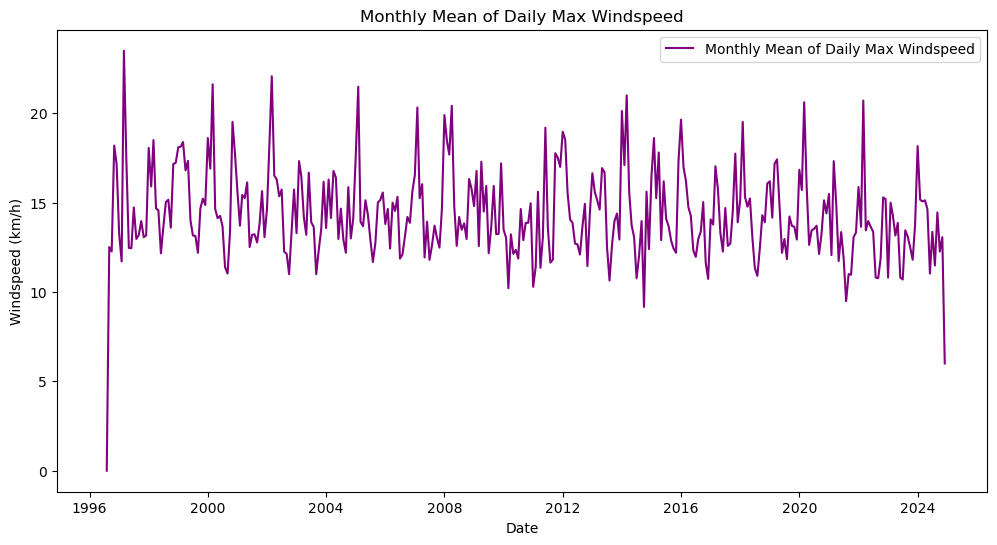

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Windspeed Over Time
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['wdsp'], color='blue', label='Windspeed')
plt.title('Windspeed Over Time')
plt.xlabel('Date')
plt.ylabel('Windspeed (km/h)')
plt.legend()
plt.show()

# 2. Rolling Windspeed (24 hours)
rolling_wind = df['wdsp'].rolling(window=24).mean()
plt.figure(figsize=(12, 6))
plt.plot(df.index, rolling_wind, color='orange', label='24-Hour Rolling Windspeed')
plt.title('24-Hour Rolling Windspeed')
plt.xlabel('Date')
plt.ylabel('Windspeed (km/h)')
plt.legend()
plt.show()

# 3. Max Windspeed Per Day
daily_max_wind = df['wdsp'].resample('D').max()
plt.figure(figsize=(12, 6))
plt.plot(daily_max_wind.index, daily_max_wind, color='green', label='Daily Max Windspeed')
plt.title('Daily Max Windspeed')
plt.xlabel('Date')
plt.ylabel('Max Windspeed (km/h)')
plt.legend()
plt.show()

# 4. Monthly Mean of Daily Max Windspeeds
monthly_mean_max_wind = daily_max_wind.resample('M').mean()
plt.figure(figsize=(12, 6))
plt.plot(monthly_mean_max_wind.index, monthly_mean_max_wind, color='purple', label='Monthly Mean of Daily Max Windspeed')
plt.title('Monthly Mean of Daily Max Windspeed')
plt.xlabel('Date')
plt.ylabel('Windspeed (km/h)')
plt.legend()
plt.show()


## End

***